### Import Updated NBA Game Data


In [1]:
import pandas as pd
NBA_Games=pd.read_csv("../../Data/Week 2/NBA_Games2.csv")
NBA_Games.head()

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN
0,Indiana,Indiana Pacers,1610612754,Pacers,Indiana,1976,12013,IND,11300002,2013-10-05,...,15,12,8,15,23,-6.0,49,122,6.0,0
1,Chicago,Chicago Bulls,1610612741,Bulls,Illinois,1966,12013,CHI,11300002,2013-10-05,...,20,5,10,23,25,6.0,54,114,6.0,1
2,Houston,Houston Rockets,1610612745,Rockets,Texas,1967,12013,HOU,11300003,2013-10-05,...,24,9,4,22,27,-1.0,76,128,1.0,0
3,New Orleans,New Orleans Pelicans,1610612740,Pelicans,Louisiana,2002,12013,NOP,11300003,2013-10-05,...,17,12,4,15,32,1.0,74,136,1.0,1
4,Golden State,Golden State Warriors,1610612744,Warriors,California,1946,12013,GSW,11300004,2013-10-05,...,21,13,5,23,31,-9.0,60,137,9.0,0


## More on Summary Statistics
### Central Tendency vs. Variation
We will compare the success rates of two-point field goals and three-point field goals to demonstrate the difference between central tendency and variation. 
#### Calculate summary statistics for the percentages of two-point field goals and three-point field goals
- Two-point field goals

In [2]:
NBA_Games['FG_PCT'].describe()

count    17779.000000
mean         0.452485
std          0.056357
min          0.217000
25%          0.414000
50%          0.452000
75%          0.489000
max          0.684000
Name: FG_PCT, dtype: float64

- Three-point field goals


In [3]:
NBA_Games['FG3_PCT'].describe()

count    17779.000000
mean         0.350610
std          0.099538
min          0.000000
25%          0.286000
50%          0.350000
75%          0.417000
max          0.842000
Name: FG3_PCT, dtype: float64

_We can see that the average success rate of 2-point field goals is about 45.27% while the average success rate of 3-point field goals is 35.07%. That means that the overall success rate of 2-point field goals is about 10% higher than the overall success rate of 3-point field goals. The median of 2-point field goal success rate is 45.20%, while the median 3-point field goal success rate is 35.00%. This means half of the teams have 2-point field-goal success rates less than 45% and half of the teams have 3-point field goal success rate of less than 35%._

_The standard deviation for 2-point field goal success rate is 0.056, while the standard deviation for 3-point field goal success rate is 0.09956. This means that there is a greater variation in 3-point field goals than 2-point field goals._ 

### Compare the distribution of two-point field goal percentage and three-point field goal percentage using a Histogram
#### Plot two histograms side by side
_The options "sharex" and "sharey" ask if we want to restrict the same range of x and same range of y for the two histograms_

In [4]:
NBA_Games.hist(column=['FG_PCT','FG3_PCT'], bins=20, sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7aa1b8456048>,
      dtype=object)

#### Plot two histograms in the same graph in different colors

#### We will first introduce a new library "matplotlib" that provides more useful functions to make plots.
- We will use "plot.hist" instead of "hist" to make this plot
- The option "alpha" specifies transparency, so that the two histograms would not block each other entirely (alpha=0: fully transparent; alpha=1: fully opaque)
- We can also add a title and axis labels using "plt.title," "plt.xlabel" and "plt.ylabel" commands
- We can also export the graph as a png file using the "plt.savefig" command

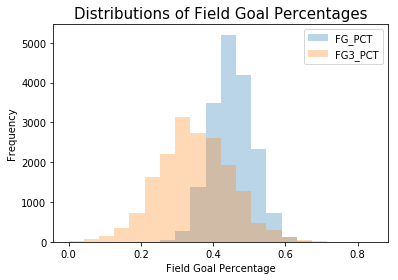

In [5]:
import matplotlib.pyplot as plt

NBA_Games[['FG_PCT','FG3_PCT']].plot.hist(alpha=0.3, bins=20)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Frequency')
plt.title("Distributions of Field Goal Percentages", fontsize=15)
plt.savefig('FG_PCT_Distributions.png')

#### Histogram by the result of the game using the "by" option
_We can also change the colors of the graphs using the "color" option_

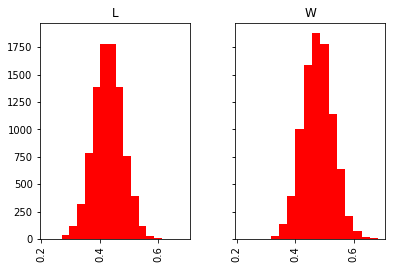

In [6]:
NBA_Games.hist(by='WL', column='FG_PCT', color='red', bins=15, sharex=True, sharey=True)
plt.savefig('FG_PCT_WL.png')

## Self Test - 1
1. Calculate summary statistics for the three-point field goal percentage by the result of the game
2. Graph a histogram of the three-point field goal percentage by the result of the game and provide interpretation
- Number of bins=10, the two subgraphs should have the same x and y ranges, color is green
- Export the graph as "FG3_PCT_Distribution" in png format

In [7]:
#Your Code Here
NBA_Games.groupby(['WL'])['FG3_PCT'].describe()

,count,mean,std,min,25%,50%,75%,max
WL,,,,,,,,
L,8890.0,0.318807,0.091695,0.0,0.259,0.318,0.379,0.714
W,8889.0,0.382416,0.096878,0.0,0.318,0.381,0.444,0.842


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7aa1b606db38>,
      dtype=object)

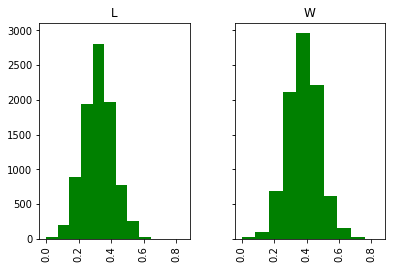

In [8]:
NBA_Games.hist(by='WL', column='FG3_PCT', bins=10, color='green', sharex=True, sharey=True)

In [9]:
plt.savefig('FG3_PCT_Distribution.png')

<Figure size 432x288 with 0 Axes>

### Create time series graphs
Let's first change the data type of "GAME_DATE" from object to datetime.

In [10]:
import datetime
NBA_Games['GAME_DATE']=pd.to_datetime(NBA_Games['GAME_DATE'])
NBA_Games['GAME_DATE'].head()

0   2013-10-05
1   2013-10-05
2   2013-10-05
3   2013-10-05
4   2013-10-05
Name: GAME_DATE, dtype: datetime64[ns]

### Subsetting a dataset
#### The dataset we are working with contains games of different NBA teams. Let's focus on one team to produce a time series graph.
Extract Pistons' game data in the 2017-2018 season.

_Note that for date variable, we can use the >, =, < operators. When we specify the condition of the date, we need to use ""_

In [11]:
Pistons_Games=NBA_Games[(NBA_Games.NICKNAME == 'Pistons')&(NBA_Games.SEASON_ID==22017)& (NBA_Games.GAME_DATE>='2017-10-17')]
display(Pistons_Games)

,CITY,TEAM_NAME,TEAM_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN
10919,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700003,2017-10-18,...,24,14,3,8,21,12.0,61,134,12.0,1
10950,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700020,2017-10-20,...,19,12,1,19,32,-4.0,68,130,4.0,0
10971,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700030,2017-10-21,...,21,5,2,12,25,4.0,67,136,4.0,1
10990,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700041,2017-10-23,...,14,5,2,14,21,-11.0,53,134,11.0,0
11019,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700056,2017-10-25,...,32,7,3,14,22,21.0,74,143,21.0,1
11085,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700091,2017-10-29,...,22,16,0,13,9,8.0,72,137,8.0,1
11108,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700104,2017-10-31,...,21,7,3,12,11,-20.0,52,130,20.0,0
11137,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700119,2017-11-03,...,21,10,4,12,11,9.0,68,132,9.0,1
11161,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700132,2017-11-04,...,28,10,3,14,19,9.0,68,125,9.0,1
11211,Detroit,Detroit Pistons,1610612765,Pistons,Michigan,1948,22017,DET,21700159,2017-11-08,...,25,3,5,15,22,17.0,71,135,17.0,1


#### Now we can plot the points earned by the Pistons by time. 


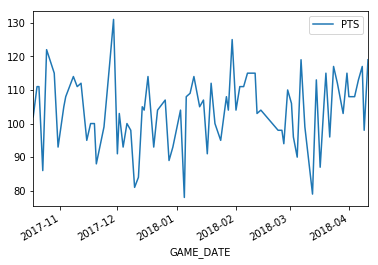

In [12]:
Pistons_Games.plot(x='GAME_DATE', y='PTS')
plt.savefig('PISTONS_PTS_TIME.png')

## Self Test - 2
1. Graph Toronto Raptors' points in each game throughout the 2018-2019 seaon. 
(SEASON ID is 22018, and the regular season started on October 16, 2018.)
2. Export the graph as "RAPTORS_PTS_TIME" in png format

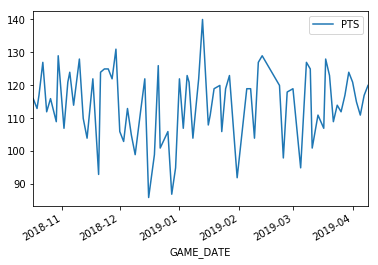

In [13]:
#Your Code Here
Raptors_Games=NBA_Games[(NBA_Games.NICKNAME == 'Raptors')&(NBA_Games.SEASON_ID==22018)& (NBA_Games.GAME_DATE>='2018-10-16')]
Raptors_Games.plot(x='GAME_DATE', y='PTS')

In [14]:
plt.savefig('RAPTORS_PTS_TIME.png')

<Figure size 432x288 with 0 Axes>

## Correlation Analysis
### We can first detect the relationship between two variables in a scatterplot.
#### Let's use the number of assists and the number of field goals made as an example.
We can create a scatter plot using the "plot.scatter" function with the number of assists in the horizontal axis and the number of field goals made in the vertical axis.

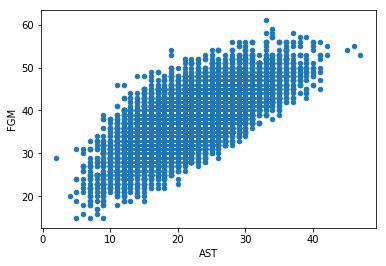

In [15]:
NBA_Games.plot.scatter(x='AST', y='FGM')

#### We can use the functions in the "seaborn" library to graph the relationships between two variables

#### We will use the function "regplot" to graph the two variables. This function graphs a scatterplot as well as a regression line.
_We will learn about regression analysis more systematically in week 4_


Text(0.5, 1.0, 'Relationship between the Numbers of Assists and Field Goals Made')

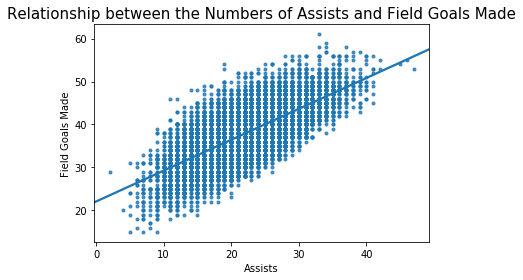

In [16]:
import seaborn as sns
sns.regplot(x='AST', y='FGM', data=NBA_Games,  marker='.')
plt.xlabel('Assists')
plt.ylabel('Field Goals Made')
plt.title("Relationship between the Numbers of Assists and Field Goals Made", fontsize=15)

_As we can see from the graph, as the number of assists increase, the number of field goals made also increases. In this case, we say there is a positive relationship between the two variables, or a positive correlation._ 



### Correlation Coefficient
#### We can quantify the linear correlation by a correlation coefficient. A correlation coefficient measures the joint variability of two random variables.  We can calculate correlation coefficient using the "corr" function.


In [17]:
NBA_Games['AST'].corr(NBA_Games['FGM'])

0.6965185691036626

_The correlation coefficient between the number of assist and field goal made is 0.70 so there is a positive correlation between the two._ 

#### Let's investigate the relationship between the number of assists and the number of field goals attempted.


Text(0.5, 1.0, 'Relationship between the Numbers of Assists and Field Goals Attempted')

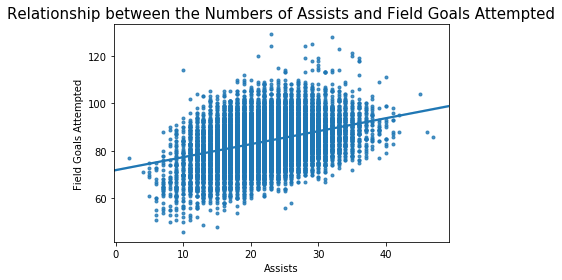

In [18]:
sns.regplot(x='AST', y='FGA', data=NBA_Games,  marker='.')
plt.xlabel('Assists')
plt.ylabel('Field Goals Attempted')
plt.title("Relationship between the Numbers of Assists and Field Goals Attempted", fontsize=15)

In [19]:
NBA_Games['AST'].corr(NBA_Games['FGA'])

0.3580107833113529

_Both the graph and the correlation coefficient suggest that there is only a slight positive relationship between the two._


### We can further graph the scatter plot by group using the "hue" option.
#### Let's separate by the results of the game (win or lose), and produce scatter plots between number of assists and field goals made.
_In this case, we can use lmplot() instead of regplot()._ 
- lmplot() combines regplot() and FacetGrid.
- FacetGrid produces multi-plot grid for plotting conditional relationships. Thus, FacetGrid allows us to separate the dataset into multiple panels based on specified conditions to visualize the relationship between multiple variables. 

Text(0.5, 1.0, 'Relationship between the Numbers of Assists and Field Goals Made')

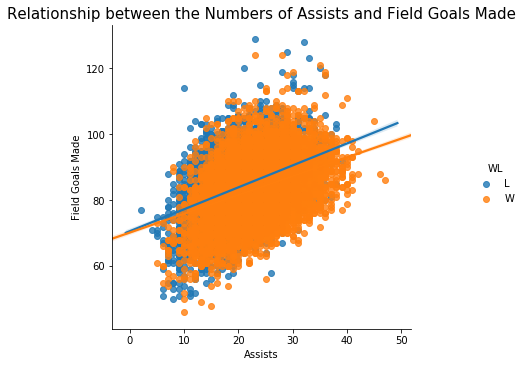

In [20]:
sns.lmplot(x='AST', y='FGA', hue='WL', data=NBA_Games)
plt.xlabel('Assists')
plt.ylabel('Field Goals Made')
plt.title("Relationship between the Numbers of Assists and Field Goals Made", fontsize=15)

### We can also find correlation coefficients for all the numerical variables.
We will specify the method to be pearson. 


In [21]:
NBA_Games.corr(method='pearson')

,TEAM_ID,YEAR_FOUNDED,SEASON_ID,GAME_ID,MIN,PTS,FGM,FGA,FG_PCT,FG3M,...,AST,STL,BLK,TOV,PF,PLUS_MINUS,GM,GA,POINT_DIFF,WIN
TEAM_ID,1.000000,0.159684,-0.028499,-0.004395,0.009351,-0.039739,-0.022654,-0.015416,-0.014638,-0.113377,...,-0.099493,-0.012723,0.001869,-0.029375,0.009959,-0.000230,-0.045124,-0.071552,-0.006167,-0.005021
YEAR_FOUNDED,0.159684,1.000000,-0.007430,0.001668,0.004383,-0.023968,-0.025650,-0.057025,0.016595,-0.080916,...,-0.071955,-0.025948,0.005549,-0.092220,-0.044801,0.019938,-0.019812,-0.079766,-0.025487,0.018298
SEASON_ID,-0.028499,-0.007430,1.000000,-0.017029,0.038428,0.001082,-0.001468,-0.011046,0.008601,0.029134,...,-0.037363,-0.071756,0.001645,-0.148397,-0.033619,-0.000098,0.002516,-0.002400,0.034086,0.000007
GAME_ID,-0.004395,0.001668,-0.017029,1.000000,-0.795786,-0.385555,-0.397515,-0.425308,-0.159096,-0.133298,...,-0.357418,0.015759,-0.031720,0.088664,0.113199,-0.001348,-0.328031,-0.309005,-0.041346,-0.000216
MIN,0.009351,0.004383,0.038428,-0.795786,1.000000,0.426840,0.419529,0.519493,0.107260,0.147632,...,0.327648,0.009281,0.062864,-0.037703,0.004222,0.002040,0.375849,0.418456,-0.071876,0.000905
PTS,-0.039739,-0.023968,0.001082,-0.385555,0.426840,1.000000,0.867683,0.450413,0.687911,0.551357,...,0.645715,0.087527,0.076797,-0.135769,0.079831,0.510800,0.951691,0.573085,-0.004586,0.411991
FGM,-0.022654,-0.025650,-0.001468,-0.397515,0.419529,0.867683,1.000000,0.567172,0.752900,0.386788,...,0.696519,0.075070,0.077765,-0.173950,-0.021522,0.455110,0.673122,0.345795,0.030095,0.345159
FGA,-0.015416,-0.057025,-0.011046,-0.425308,0.519493,0.450413,0.567172,1.000000,-0.108339,0.210054,...,0.358011,0.097593,0.052087,-0.290790,-0.004342,0.010156,0.319723,0.686780,-0.008601,-0.034392
FG_PCT,-0.014638,0.016595,0.008601,-0.159096,0.107260,0.687911,0.752900,-0.108339,1.000000,0.297176,...,0.553814,0.010608,0.051534,0.021360,-0.024364,0.537798,0.558314,-0.126521,0.039784,0.442808
FG3M,-0.113377,-0.080916,0.029134,-0.133298,0.147632,0.551357,0.386788,0.210054,0.297176,1.000000,...,0.455304,0.001757,0.014574,-0.035839,0.009143,0.314799,0.581310,0.475984,0.041768,0.229511
